# Assignment 2: Central Limit Theorem

**Name:** [Fatma Mohamed Okasha]  
**ID:** [251000148]

## Introduction

In this assignment, you will investigate the Central Limit Theorem (CLT) using an exponentially distributed population.
You will generate samples of different sizes from this population and examine how the distribution of sample means
approaches a normal distribution as the sample size increases.

### Objectives
- Understand the exponential distribution and its properties.
- Explore the application of the CLT to the exponential distribution.
- Conduct hypothesis testing on the means of the samples.

## Instructions

Follow the tasks below to complete this assignment. Each task includes code placeholders and detailed prompts.
Ensure you comment your code where appropriate.

### Task 1: Explore the Exponential Distribution

**Instructions:**
- Generate an exponentially distributed population with a mean of 2.0.
- Plot the histogram of the population.
- Compute and print the mean and standard deviation of the population.

mean of data = 1.9280371982490054
std of data  =  1.873748981309266


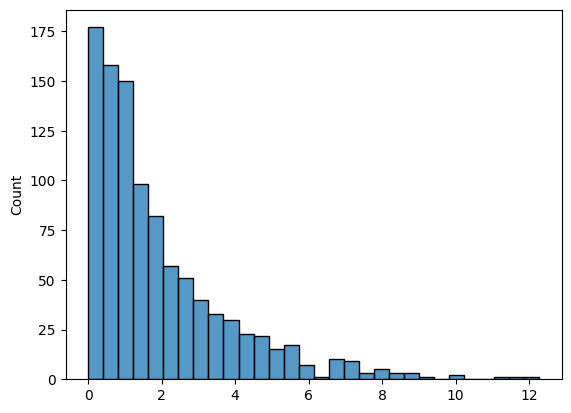

In [25]:
# Task 1: Generate Exponential Distribution
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Generate population
population_data = np.random.exponential(scale=2.0, size=1000)



# Step 2: Plot histogram
sns.histplot(population_data)

# Step 3: Calculate and print statistics
mean = np.mean(population_data)
std = np.std(population_data)
print("mean of data =" ,mean)
print("std of data  = ",std)


### Task 2: Sample Means and CLT

**Instructions:**
- Draw random samples of sizes `n = 5, 30, 100` from the population.
- Compute the sample means for 10,000 samples at each sample size.
- Plot the histograms of sample means for each sample size.
- Compare the histograms to a normal distribution.

10000


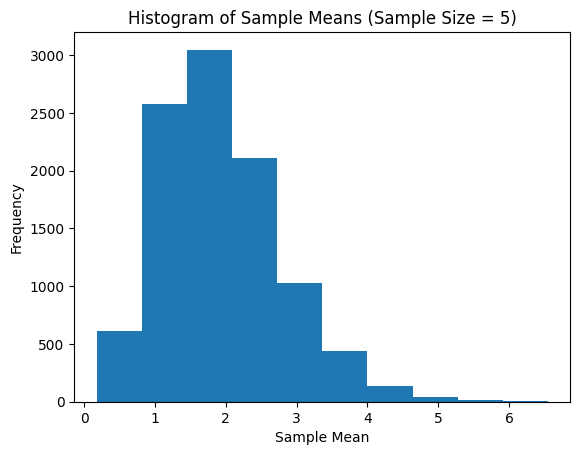

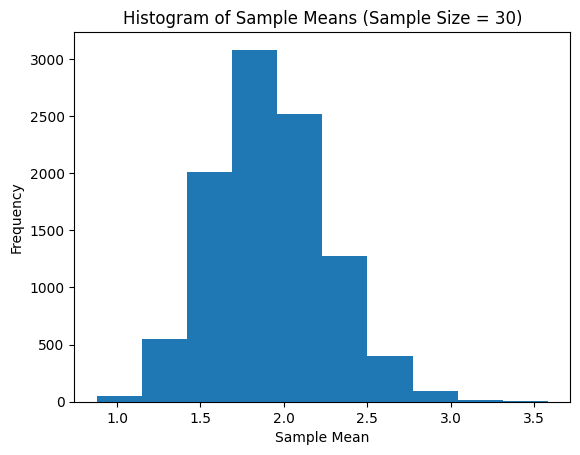

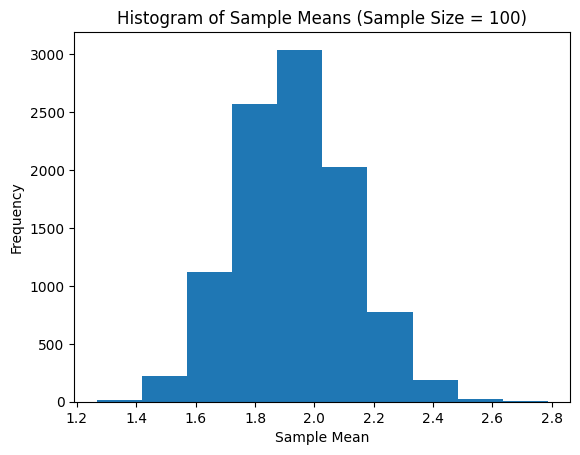

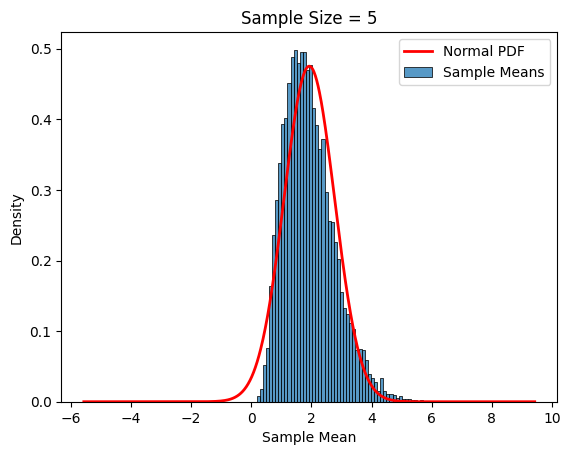

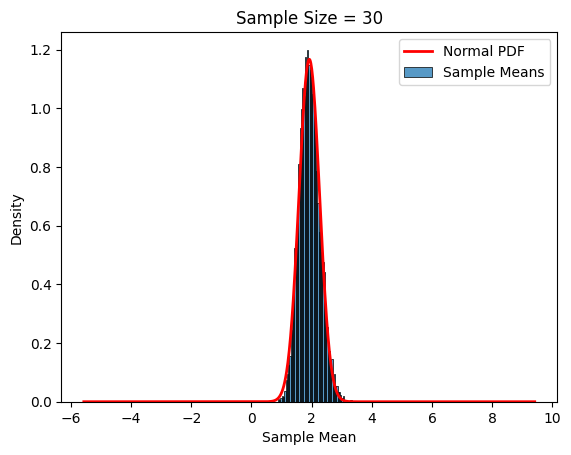

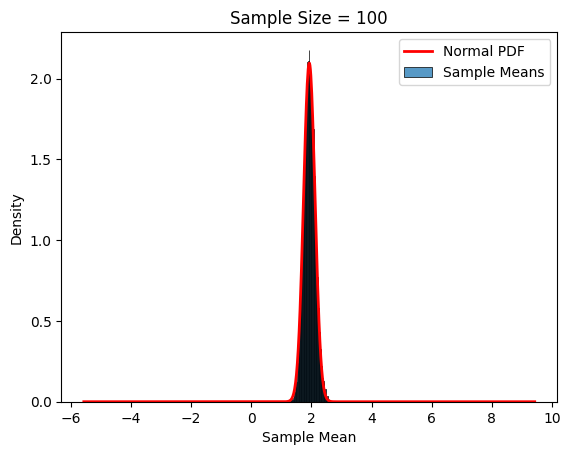

In [26]:
# Task 2: Sample Means and CLT
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Step 1: Generate sample means
sample_sizes = [5, 30, 100]
num_samples = 10000
sample_means = []
all_sample_means = {}

for n in sample_sizes:
    sample_means = []
    for i in range(num_samples):
      sample =np.random.choice(population_data, size=n)
      sample_means.append(np.mean(sample))
    all_sample_means[n] = sample_means

# print(all_sample_means)
# print(sample_means)
print(len(sample_means))



# Step 2: Plot histogram
for n in sample_sizes:
  plt.hist(all_sample_means[n])
  plt.title(f"Histogram of Sample Means (Sample Size = {n})")
  plt.xlabel("Sample Mean")
  plt.ylabel("Frequency")
  plt.show()



# Step 3: Overlay normal distribution
for n in sample_sizes:
    means = np.array(all_sample_means[n])
    sigma = np.std(means)
    mu = np.mean(means)

    sns.histplot(means, stat='density', label='Sample Means')

    x = np.linspace(mu - 4*std, mu + 4*std, 1000)
    plt.plot(x, norm.pdf(x, mu, sigma), 'r', lw=2, label='Normal PDF')

    plt.title(f"Sample Size = {n}")
    plt.xlabel("Sample Mean")
    plt.ylabel("Density")
    plt.legend()
    plt.show()


### Task 3: Hypothesis Testing

**Instructions:**
- Select a sample size of `n = 30`.
- Perform a hypothesis test to determine if the sample mean is significantly different from the population mean.
- Use a significance level of 0.05.

In [27]:
# Task 3: Hypothesis Testing
from scipy.stats import ttest_1samp

# Step 1: Generate a sample
sample = np.random.choice(population_data, size=30)

# Step 2: Perform t-test
ttest,p_value=ttest_1samp(sample,np.mean(population_data))
print("p_value = ",p_value)


# Step 3: Interpret results
alpha=0.05
if p_value < alpha :
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")


p_value =  0.3319779373184383
Fail to reject null hypothesis


### Task 4: Comparing Distributions

**Objective**: Compare how the Central Limit Theorem applies to different population distributions.

**Instructions:**
1. Use three different distributions: Uniform, Exponential, and a heavy-tailed distribution (e.g., Pareto).
2. For each distribution, generate a population and calculate sample means for sample sizes $n = 10, 50, 100$.
3. Compare the histograms of the sample means for the three distributions.
4. Discuss how the shape of the original population distribution influences the convergence to a normal distribution.

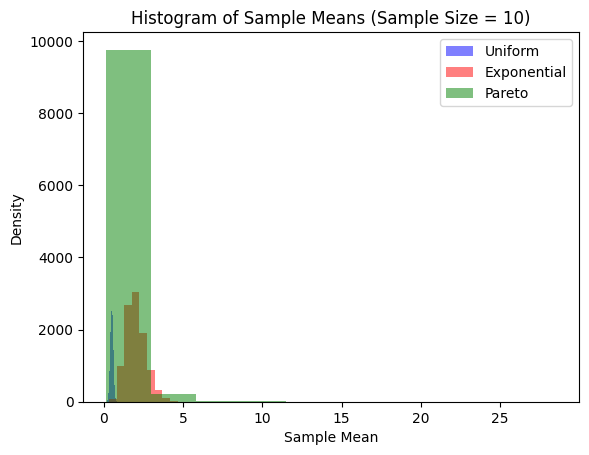

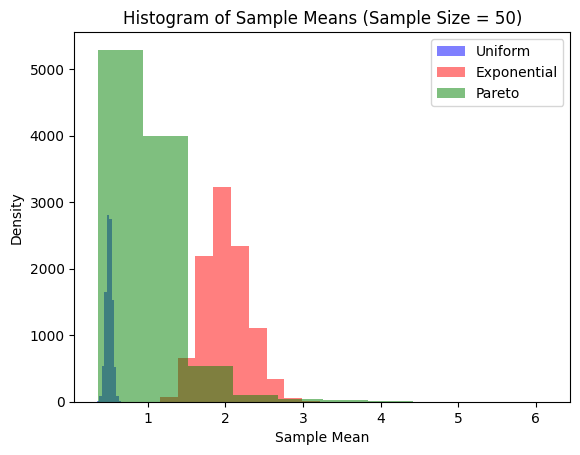

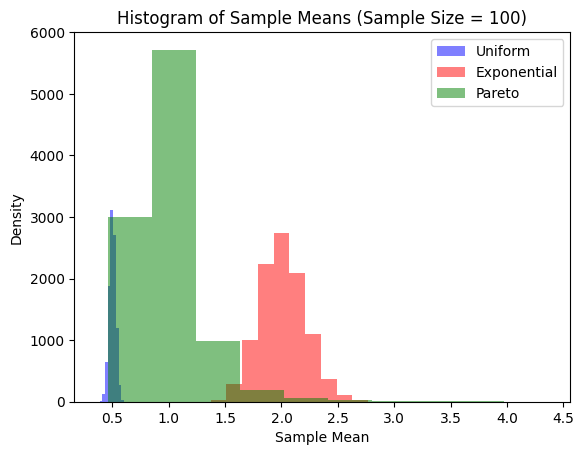

In [28]:
# Task 4: Comparing Distributions
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

population_uniform_data = np.random.uniform(size=100000)
population_Exponential_data = np.random.exponential(scale=2.0, size=100000)
population_Pareto_data = np.random.pareto(a=2 , size=100000)
# print(population_uniform_data )
# print(population_Exponential_data)
# print(population_Pareto_data)

sample_sizes = [10, 50, 100]
num_samples = 10000
all_sample_means = {
    'Uniform': {},
    'Exponential': {},
    'Pareto': {}
}
# sample_mean=[]

for n in  sample_sizes:

  # ---- Uniform Distribution ----
    sample_means_uniform = []
    for i in range(num_samples):
        sample = np.random.choice(population_uniform_data, size=n)
        sample_means_uniform.append(np.mean(sample))
    all_sample_means['Uniform'][n] = sample_means_uniform

    # ---- Exponential Distribution ----
    sample_means_exponential = []
    for i in range(num_samples):
        sample = np.random.choice(population_Exponential_data, size=n)
        sample_means_exponential.append(np.mean(sample))
    all_sample_means['Exponential'][n] = sample_means_exponential

    # ---- Pareto Distribution ----
    sample_means_pareto = []
    for i in range(num_samples):
        sample = np.random.choice(population_Pareto_data, size=n)
        sample_means_pareto.append(np.mean(sample))
    all_sample_means['Pareto'][n] = sample_means_pareto

# print(len(all_sample_means["Uniform"][10]))


#Compare the histograms of the sample means for the three distributions:
for n in sample_sizes:
  plt.hist(all_sample_means['Uniform'][n], color='blue', alpha=0.5, label='Uniform')
  plt.hist(all_sample_means['Exponential'][n], color='red', alpha=0.5, label='Exponential')
  plt.hist(all_sample_means['Pareto'][n], color='green', alpha=0.5, label='Pareto')
  plt.title(f"Histogram of Sample Means (Sample Size = {n})")
  plt.xlabel("Sample Mean")
  plt.ylabel("Density")
  plt.legend()
  plt.show()

# for n in sample_sizes:
    # plt.figure(figsize=(10, 6))
    # sns.histplot(all_sample_means['Uniform'][n], color='blue', label='Uniform', kde=True, stat='density')
    # sns.histplot(all_sample_means['Exponential'][n], color='red', label='Exponential', kde=True, stat='density')
    # sns.histplot(all_sample_means['Pareto'][n], color='green', label='Pareto', kde=True, stat='density')
    # plt.title(f"Histogram of Sample Means (Sample Size = {n})")
    # plt.xlabel("Sample Mean")
    # plt.ylabel("Density")
    # plt.legend()
    # plt.show()




# Discuss how the shape of the original population distribution influences the convergence to a normal distribution


#  1) Uniform Distribution:

#     - Sample means look normal quickly, even with small samples.
#     - Reason: the original data is already symmetric.

#  2) Exponential Distribution:

#     - Sample means are slightly skewed for small samples
#     - With larger samples (50–100), the sample means become more normal.
#     - Reason: CLT smooths the skew as sample size increases.

#  3) Pareto Distribution (Heavy-Tailed):

#     - Sample means still skewed even with n=100
#     - Reason: very large values (outliers) make convergence slower.


#     Central Limit Theorem (CLT) says: If you take the mean of many samples, the result tends to be normal  no matter the population shape

#         Speed of convergence depends on the population:
#           - Symmetric → fast
#           - Skewed → moderate
#          - Heavy-tailed → slow










### Task 5: Impact of Sample Size

**Objective**: Explore the impact of sample size on the accuracy of statistical inference.

**Instructions:**
1. Generate sample means for $n = 10, 30, 50, 100, 500$.
2. Calculate the standard error of the mean (SEM) for each sample size.
3. Plot the SEM against sample size and discuss the relationship.
4. Explain how the CLT justifies this relationship.

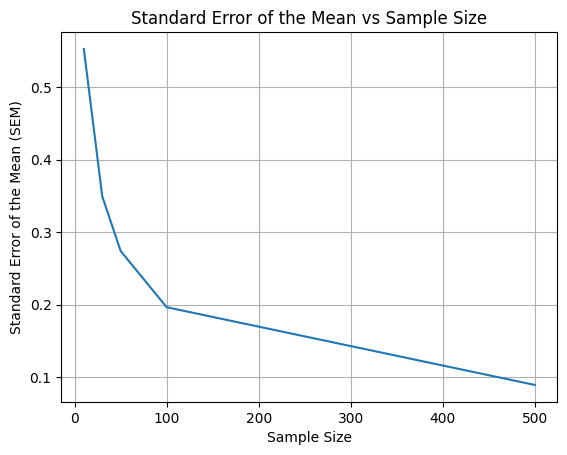

In [29]:
# Task 5: Impact of Sample Size
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

population_data= np.random.exponential(scale=2.0, size=100000)
sample_sizes = [10, 30, 50, 100, 500]
num_samples = 10000
all_sample_errors={}

for n in sample_sizes:
  sample_standard_deviation = []
  for i in range(num_samples):
    sample = np.random.choice(population_data, size=n)
    sample_standard_deviation.append(np.std(sample))
  all_sample_errors[n]= np.array(sample_standard_deviation) / np.sqrt(n)

# print(all_sample_errors)


mean_SEM = []
for n in sample_sizes:
    mean_SEM.append(np.mean(all_sample_errors[n]))


plt.plot(sample_sizes, mean_SEM)
plt.title("Standard Error of the Mean vs Sample Size")
plt.xlabel("Sample Size")
plt.ylabel("Standard Error of the Mean (SEM)")
plt.grid(True)
plt.show()


# Explain how the CLT justifies this relationship.:


# As the sample size increases, the Standard Error of the Mean (SEM) decreases.
# This means larger samples give more accurate estimates of the population mean.
# According to the Central Limit Theorem (CLT):
# - The sampling distribution of the mean becomes approximately normal, regardless of the population shape.
# - Its standard deviation (SEM) is given by: SEM = σ / sqrt(n), where σ is the population standard deviation.
# - As n increases, dividing by sqrt(n) reduces the SEM, so the sample mean varies less between samples.
# This explains why bigger samples lead to more precise estimates.






### Task 6: Working with Real-World Datasets

**Objective**: Apply the Central Limit Theorem to a real-world dataset to validate its application.

**Instructions:**
1. Load a real-world dataset (e.g., from `seaborn` or a CSV file).
2. Select a numeric column to analyze (e.g., `age`, `income`).
3. Randomly sample subsets of the data and compute the mean of the selected column for each subset.
4. Plot the histogram of the sample means and overlay it with a normal distribution curve.
5. Discuss how the CLT applies to the dataset and any potential limitations.


mean of fare column = 32.204207968574636


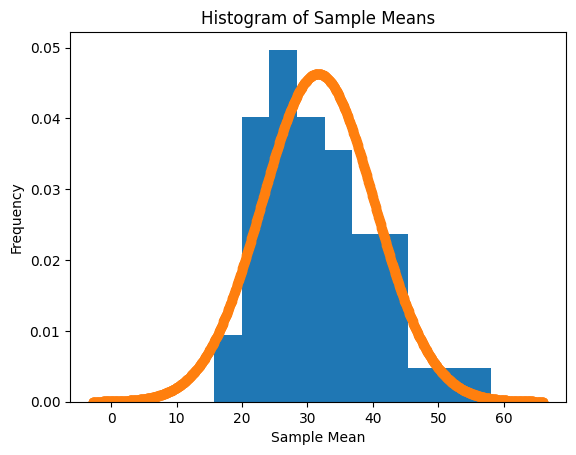

In [30]:
# Task 6: Working with Real-World Datasets
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm



# Step 1: Load the dataset ( choose any dataset)
# Example: Using seaborn's Titanic dataset

dataset=sns.load_dataset("titanic")
# print(dataset)

fare_column = np.array(dataset['fare'])
# print(fare_column)
print("mean of fare column =",np.mean(np.array(dataset['fare'])))



# Step 2: Sample subsets and compute means

sample_means=[]
for i in range(100):
   sample=dataset.sample(n=30, replace=True)
   sample_means.append(sample['fare'].mean())

# print("----sample means--- ",sample_means)
sample_means = np.array(sample_means)

# Step 3: Plot histogram and overlay normal distribution
# Step 3: Plot histogram of sample means
# Step 4: Overlay normal distribution curve


mu =np.mean(sample_means)
sigma = np.std(sample_means)

plt.hist(sample_means, density=True)

x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
plt.plot(x, norm.pdf(x, mu, sigma),"o")

plt.title("Histogram of Sample Means")
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")
plt.show()

# Discuss how the CLT applies to the dataset and any potential limitations.


# Observation:
# - The histogram of sample means looks like a bell shape (normal),
#   even though the original data (total_bill) is skewed.

# Why this happens (CLT):
# - The Central Limit Theorem (CLT) says that if you take many samples,
#   the average of each sample will form a normal (bell-shaped) distribution,
#   no matter what the original data looks like.

# Limitations :
# - With very small samples (like n=2-5), the sample mean may not look normal.
# - Larger samples make the sample mean more normal and stable.
# - Outliers in the data can affect the shape a little.










## Submission Guidelines

- Ensure all code cells are executed and outputs are visible.
- Submit the completed notebook as `Assignment_2_CLT.ipynb`.
- Include your **Name** and **ID** at the top.